<a href="https://colab.research.google.com/github/CarolineAndradeR/Python/blob/master/Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teoria**

**Conceitos de Probabilidade**
*   Uma médida numérica sobre a possibilidade de um determinado evento ocorrer.
*   Projeções diversas, estimação do risco e criação de cénarios.
*   Os princípios de contagens de eventos, permutação, combinação e condicionalidade.



A contagem de **eventos** é a atividade de obter todas as possibilidades dentro de um conjunto de ações realizadas. Um evento pode ou não acontecer.

*   **Permutação** - Quando a ordem dos eventos importa. 
*   **Combinação** - Quando precisa arranjar os eventos sem considerar a ordem.
*   **Condicionalidade** - Existe três formas: simples, combinado e condicional.

> **Simples** - Obtida de forma direta.

> **Combinada** - Quando existe duas posibilidade do evento acontecer.

> **Consicional** - Um evento pode acontecer com base em um evento anterior.








**Váriavel Aleatório**
*   Discreta - Possui um número finito de resultados. (Apenas duas opções)
*   Contínuas - Resultados amplos que é quase impossível realzizar uma contagem.

**Distribuições Discretas**
*   Binominal e Poisson

**Distribuições Contínuass**
*   Exponencial e Normal



**Principais funções**

*   Permutação - **permutations()**
*   Combinação - **combinations(), combinations_with_replacement()**
*   Histogramas - **hist, displot**
*   Distribuição Binomial - **binom()**
*   Distribuição Poisson - **poisson()**
*   Distribuição Exponencial - **expon()**
*   Distribuição Normal - **norm()**

# **Permutação e Combinações**

In [25]:
# modulos
from itertools import product, permutations, combinations, combinations_with_replacement
from math import factorial
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, expon, norm
#dados
dados_acidentes = pd.read_csv('/content/drive/MyDrive/acidentes.csv')
dados_vinho = pd.read_csv('/content/drive/MyDrive/vinho_nacional.csv', sep = ';', decimal = ',')

Problema comum: Método eficiente para criação de senhas.


*   Seis caracteres que pode ser apenas números.
*   Não pode ser repetidos.
*   A ordem dos números importa.



In [26]:
#Número maximo de senhas posiveis.
def formula_permutacao(n, k, repeticao = False):
    if repeticao is True:
        return n**k
    else:
#Nesta opção os números não pode se repetir - Opção 3 
        return factorial(n) / factorial(n-k)
#Opção 2 quando os números pode ser repetidos
#       return factorial(n) / factorial(k)
#obter o numero de permutacoes

elementos = 10
escolhas = 6
formula_permutacao(n=elementos, k=escolhas, repeticao = False)

151200.0

**Números da mega sena**
*   Escolher 6 números dentro das 60 possibilidades.
*   Uma vez que o número foi sorteado ele não pode se repetir.
*   A ordem dos números não importa.





In [27]:
#Coombinações possiveis

def formula_combinacao(n, k, repeticao = False):
    if repeticao is False:
        return factorial(n) / (factorial(k) * factorial(n-k))
    else:
      #return factorial(n) / (factorial(k) * factorial(n - k))
      return factorial(n + k - 1) / (factorial(k) * factorial(n - 1))
#aplicar a formula
n = 60
k = 6
formula_combinacao(n, k)

50063860.0

# **Distribuição de frequência (HISTOGRAMAS)**


In [29]:
#ajuste da data
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'], errors='coerce')
dados_acidentes['data_acidente_mensal'] = dados_acidentes['data_acidente'].dt.strftime('%Y-%m')
#contagem do numero de acidentes por dia
dados_acidentes_mensal = dados_acidentes.groupby('data_acidente_mensal').size().to_frame('n').reset_index()

Text(0.29999999999999716, 0.5, 'Frequencia')

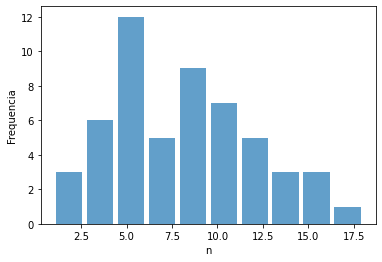

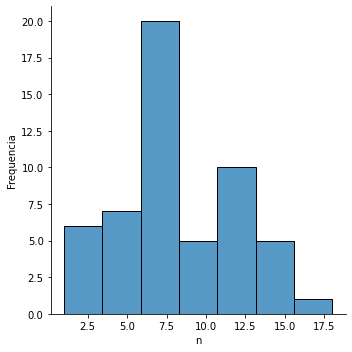

In [30]:
#histograma com matplotlib
plt.hist(dados_acidentes_mensal['n'], alpha=0.7, rwidth=0.85)
plt.xlabel('n')
plt.ylabel('Frequencia')
# histograma com seaborn
sns.displot(dados_acidentes_mensal['n'])
plt.ylabel('Frequencia')

# **Distribuições Discretas**

**Distribuição Binomial**
> Consiste em N eventos de dois resultados possíveis (sim/não, sucesso/fracasso), cas evento é independente e a probabilidade de cada evento ocorrer está entre 0 e 1.

In [31]:
#problema 1
n = 50
p = 0.05
x = 5
binom.pmf(k=x, n = n, p = p)
#problema 2
n = 70
p = 0.02
x = 4
binom.pmf(k = x, n = n, p = p)
#problema 3
n = 200
p = 0.03
x = [7, 8, 9, 10]
np.sum(binom.pmf(k = x, n = n, p = p))

0.35355705742373844

# **DISTRIBUIÇÕES PROBABILÍSTICAS**

In [ ]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

arq_dados_stream = '/content/drive/MyDrive/netflix_titles.csv'
df_dados_stream = pd.read_csv(arq_dados_stream)
df_dados_stream.head(10)

In [ ]:
idx_movies_2020 = (df_dados_stream['type'] == 'Movie') & (df_dados_stream['release_year'] == 2020)
df_dados_filmes = df_dados_stream[ idx_movies_2020]
# | - ou
idx_comedias_dramas_2020 = df_dados_filmes['listed_in'].str.contains('Comedies|Dramas')
df_comedias_dramas = df_dados_filmes[ idx_movies_2020]
df_comedias_dramas